In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

# Precipitation Effect

## Regional differences

In [3]:
# Read Data

trend = np.loadtxt(fr"D:\grd_studies\grd\data\trend_p\total_trend.txt")
trend = trend * 1000
loc = np.loadtxt(fr"D:\grd_studies\grd\data/region.txt")
trend = trend[loc[:,3].astype(int), :]
total_infor = np.hstack((trend, loc))

trend = pd.DataFrame(total_infor, columns=["Total precipitation", "RX1", "RX5", "DEXP99P", "DEXP95P", "CDD","CWD",
                                            "DLP0.1","DLP1","DLP5","DLP10","DLP20","DLP50",
                                            "None1","Lat","Lon","None2","Urban_Percentage","None3"])

    

In [4]:
def classify_city(row):
    urban_per = row["Urban_Percentage"]
    if urban_per>0:
        return "Urban"
    else:
        return "Rural"
def classify_location(row):
    lon,lat = row["Lon"], row["Lat"]
    if 111 <= lon <= 119 and 36 <= lat <= 42:
        return "BTH"
    elif 115.5 <= lon <= 123 and 27 <= lat <= 33.5:
        return "YRD"
    elif 110 <= lon <= 118 and 20.5 <= lat <= 26:
        return "PRD"
    else:
        return "Other"
trend["Region"] = trend.apply(classify_location,axis=1)
trend["Urban"] = trend.apply(classify_city,axis=1)

NameError: name 'blended_colors' is not defined

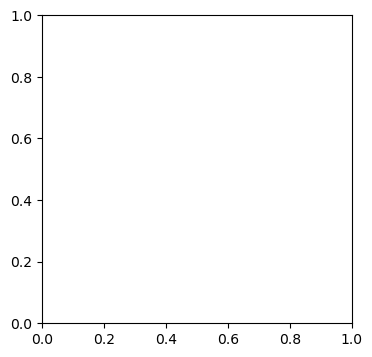

In [5]:
def polt_bar(ax,data = trend["Total precipitation"]):
    data = pd.DataFrame(data)
    data["Region"] = trend["Region"]
    data["Urban"] = trend["Urban"]
    data_mean = data.groupby(["Region", "Urban"]).mean().unstack()
    data_mean['Difference'] = data_mean.iloc[:, 0] - data_mean.iloc[:, 1]
    all_mean = data.mean(numeric_only=True)  
    data_mean.loc["All"] = all_mean
    data_mean = data_mean.drop(index="Other")
    desired_order = ['All', 'BTH', 'YRD', 'PRD']
    data_mean = data_mean.reindex(desired_order)
    ax = (data_mean
        .plot(
            kind="bar",
            color=blended_colors,
            edgecolor="black",
            linewidth=1.5,
            xlabel="Regional Difference",
            ylabel="DI (%)",
            ax =ax
        )
    )
    ax.axhline(y=0, color="black", linestyle="-", linewidth=1.5)
    ax.legend(ncol=2,loc="lower left", frameon=True)
    return ax
fig, ax = plt.subplots(figsize = (4,4))
ax = polt_bar(ax)

### Precipitation Index (All day)

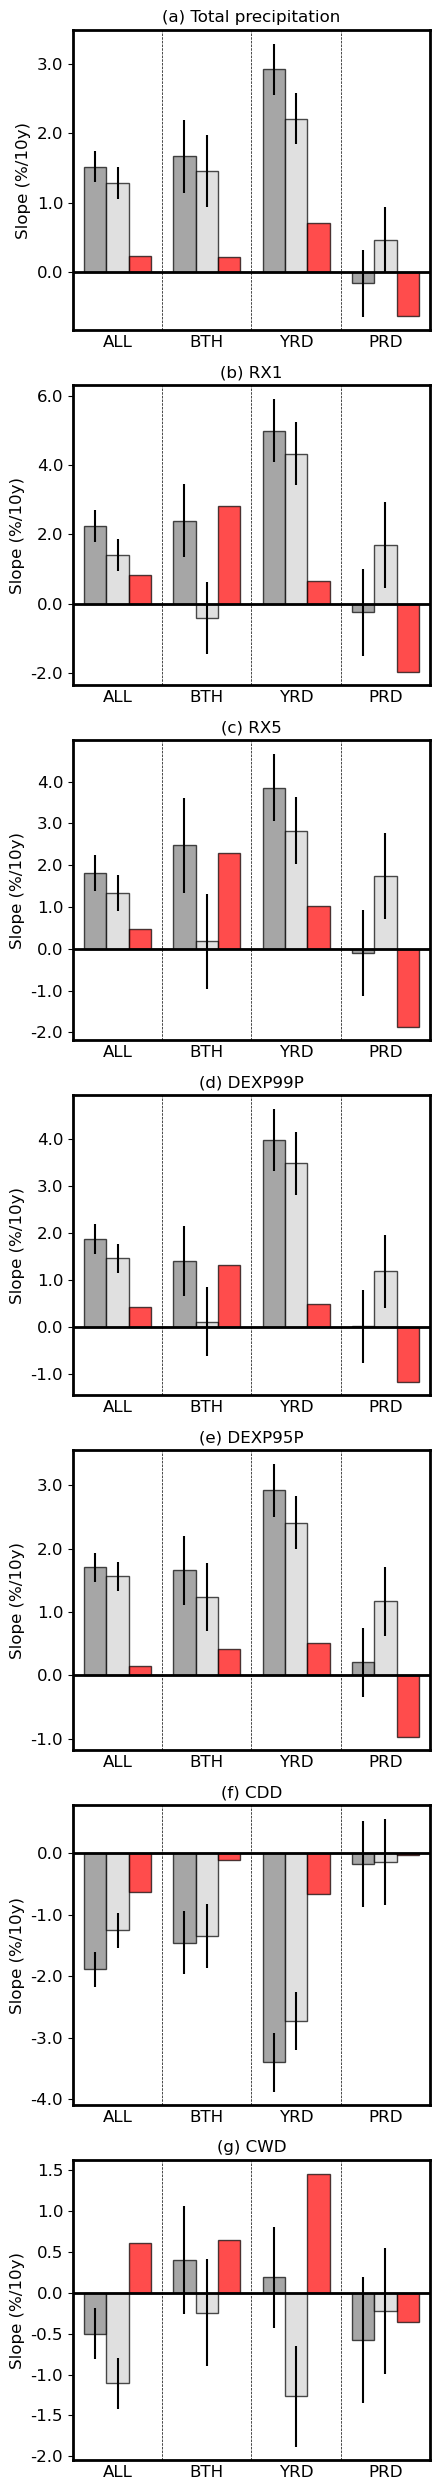

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(4.5, 25))
num = 0
titlename_list =["Total precipitation", "RX1", "RX5", "DEXP99P", "DEXP95P", "CDD","CWD",
                                            "DLP0.1","DLP1","DLP5","DLP10","DLP20","DLP50",
                                            "None1","Lat","Lon","None2","Urban_Percentage","None3"]
titlename_list = ["(a) Total precipitation", "(b) RX1", "(c) RX5", "(d) DEXP99P", "(e) DEXP95P", "(f) CDD","(g) CWD"]
for ax in axes:
    value = num
    num+=1
    trend = np.loadtxt(fr"D:\grd_studies\grd\data\trend_p\total_trend.txt")
    trend = trend * 1000
    a = np.loadtxt(fr"D:\grd_studies\grd\data/region.txt")
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    # 两个示例列表
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  # 90% 置信区间 
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2)  # 90% 置信区间 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar = []
    total_err = []
    total_lab = []
    total_col = []
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if  a[i,1] < 42 and a[i,1] >36 and a[i,2] < 119 and a[i,2] >111:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,2] < 123 and a[i,2] >115.5 and a[i,1] < 33.5 and a[i,1] >27:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,1] < 26 and a[i,1] >20.5 and a[i,2] < 118 and a[i,2] >110:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    x_pos = np.arange(len(total_bar))
    
    ax.bar(x_pos, total_bar,1, yerr=total_err, align='center', alpha=0.7, edgecolor='black', color=total_col)
    ax.set_xticks([1,5,9,13],["ALL","BTH","YRD","PRD"])
    ax.set_title(titlename_list[num-1])
    ax.set_ylabel('Slope (%/10y)', fontsize=12)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
    ax.axvline(x=3, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=7, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=11, color='black', linestyle='--', linewidth=0.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.xaxis.set_tick_params(labelsize=12,length = 0)
    ax.yaxis.set_tick_params(labelsize=12)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim([-1,len(x_pos)-1])
    plt.tight_layout()
plt.show()
fig.savefig("precipitation_index_all", dpi=300, bbox_inches="tight")

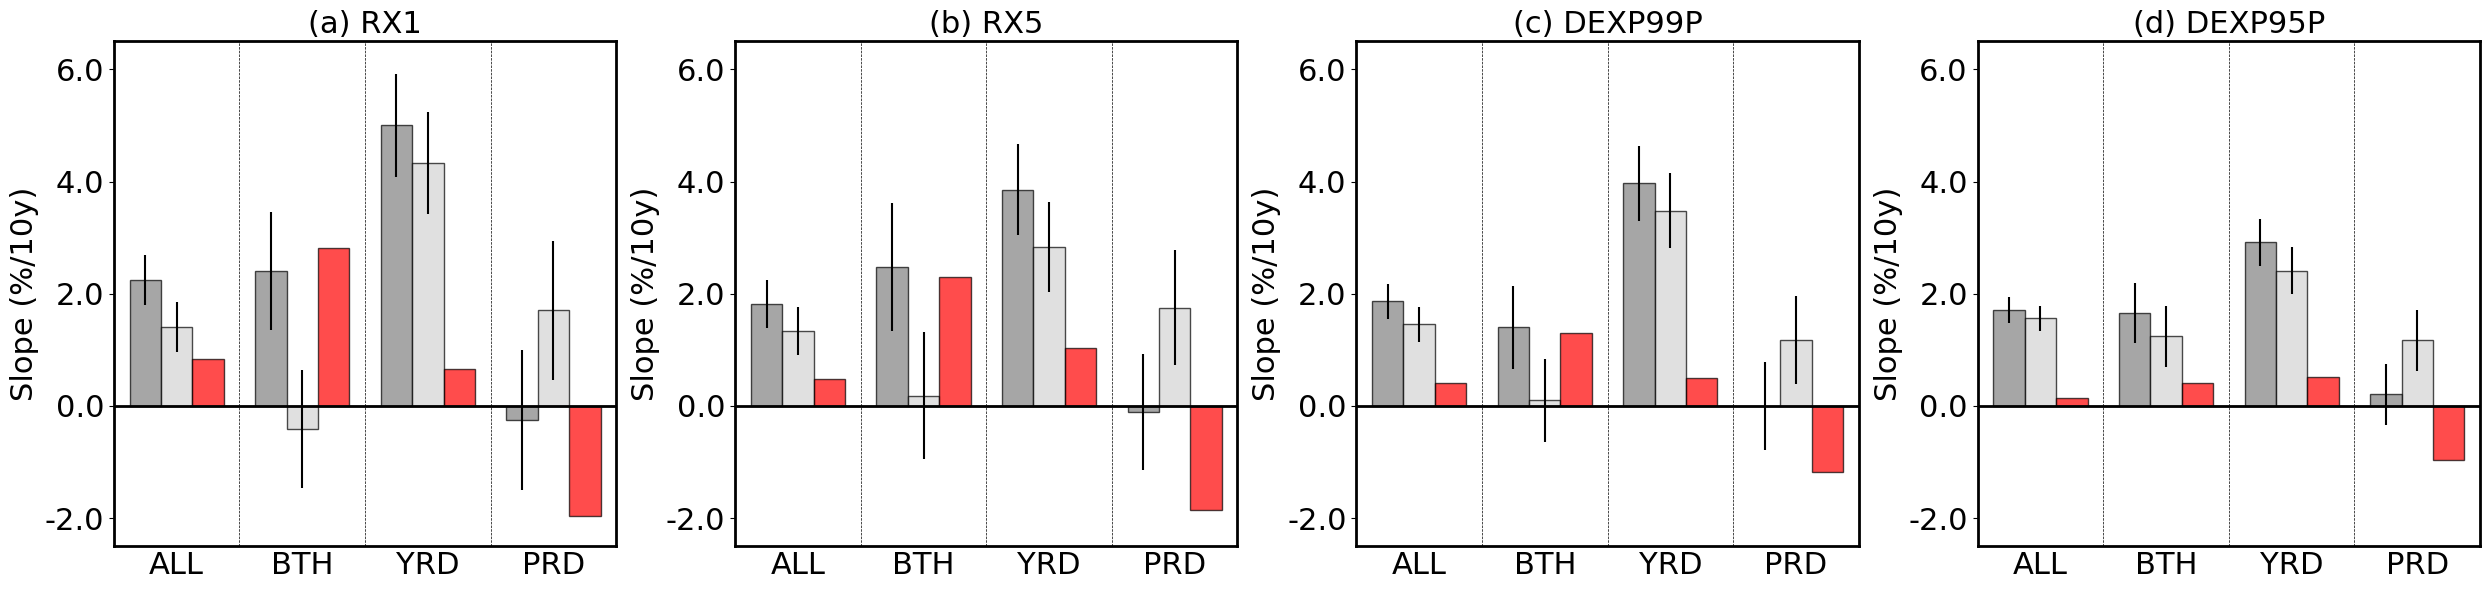

In [11]:
# for extrme precipitation
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 6))
num = 1
titlename_list = [ "Total precipitation","(a) RX1", "(b) RX5", "(c) DEXP99P", "(d) DEXP95P"]
for ax in axes:
    value = num
    num+=1
    trend = np.loadtxt(fr"D:\grd_studies\grd\data\trend_p\total_trend.txt")
    trend = trend * 1000
    a = np.loadtxt(fr"D:\grd_studies\grd\data/region.txt")
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    # 两个示例列表
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  # 90% 置信区间 
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2)  # 90% 置信区间 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar = []
    total_err = []
    total_lab = []
    total_col = []
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if  a[i,1] < 42 and a[i,1] >36 and a[i,2] < 119 and a[i,2] >111:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,2] < 123 and a[i,2] >115.5 and a[i,1] < 33.5 and a[i,1] >27:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,1] < 26 and a[i,1] >20.5 and a[i,2] < 118 and a[i,2] >110:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    x_pos = np.arange(len(total_bar))
    
    ax.bar(x_pos, total_bar,1, yerr=total_err, align='center', alpha=0.7, edgecolor='black', color=total_col)
    ax.set_xticks([1,5,9,13],["ALL","BTH","YRD","PRD"])
    ax.set_title(titlename_list[num-1], fontsize=22)
    ax.set_ylabel('Slope (%/10y)', fontsize=22)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
    ax.axvline(x=3, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=7, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=11, color='black', linestyle='--', linewidth=0.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.xaxis.set_tick_params(labelsize=22,length = 0)
    ax.yaxis.set_tick_params(labelsize=22)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim([-1,len(x_pos)-1])
    ax.set_ylim([-2.5,6.5])
    plt.tight_layout()
plt.show()
fig.savefig("precipitation_index_extreme.jpg", dpi=300, bbox_inches="tight")

### Precipitation Intensity (All day) 

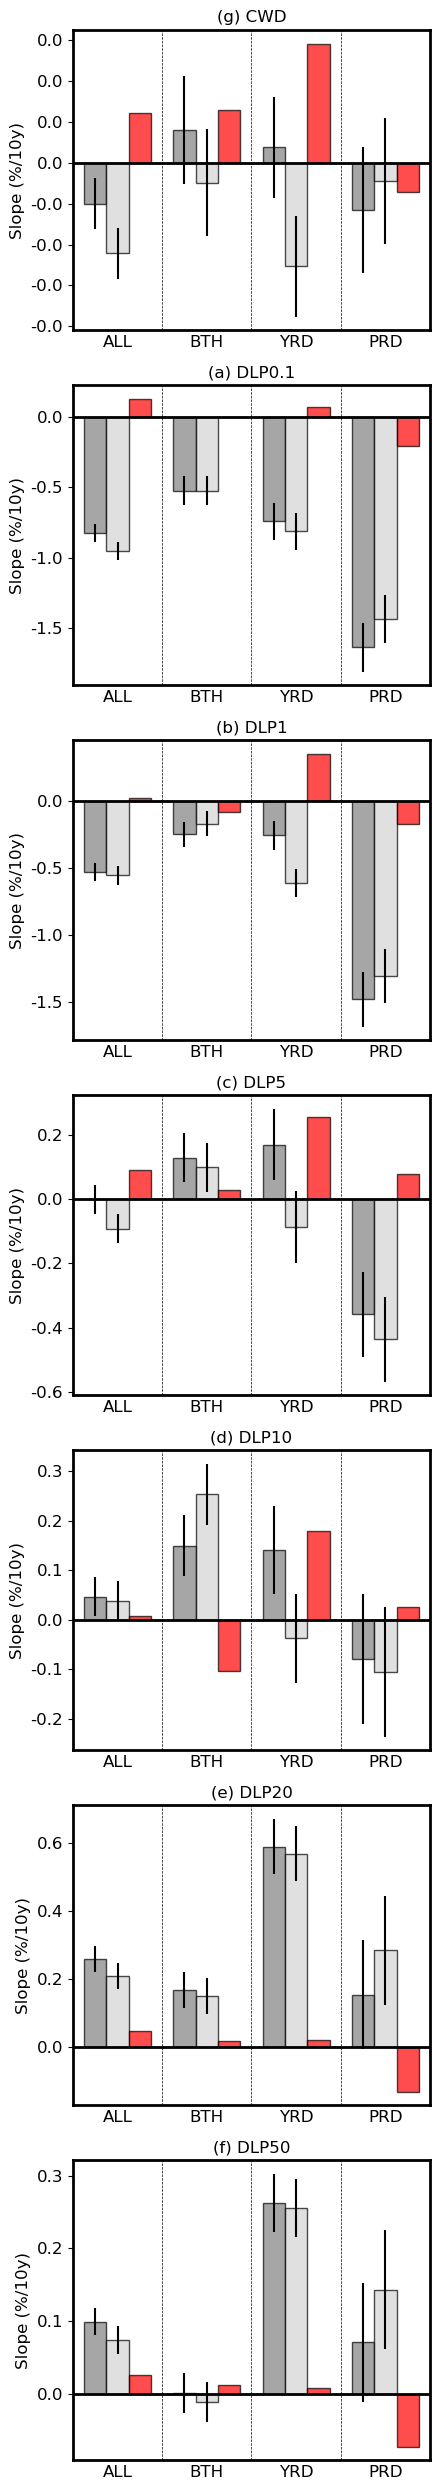

In [34]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(4.5, 25))
num = 6
titlename_list =["Total precipitation", "RX1", "RX5", "DEXP99P", "DEXP95P", "CDD","CWD",
                                            "DLP0.1","DLP1","DLP5","DLP10","DLP20","DLP50",
                                            "None1","Lat","Lon","None2","Urban_Percentage","None3"]
titlename_list = ["(a) Total precipitation", "(b) RX1", "(c) RX5", "(d) DEXP99P", "(e) DEXP95P", "(f) CDD","(g) CWD",
                  "(a) DLP0.1","(b) DLP1","(c) DLP5","(d) DLP10","(e) DLP20","(f) DLP50",]
for ax in axes:
    value = num
    num+=1
    trend = np.loadtxt(fr"D:\grd_studies\grd\data\trend_p\total_trend.txt")
    trend = trend * 10
    a = np.loadtxt(fr"D:\grd_studies\grd\data/region.txt")
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    # 两个示例列表
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  # 90% 置信区间 
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2)  # 90% 置信区间 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar = []
    total_err = []
    total_lab = []
    total_col = []
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if  a[i,1] < 42 and a[i,1] >36 and a[i,2] < 119 and a[i,2] >111:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,2] < 123 and a[i,2] >115.5 and a[i,1] < 33.5 and a[i,1] >27:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,1] < 26 and a[i,1] >20.5 and a[i,2] < 118 and a[i,2] >110:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    x_pos = np.arange(len(total_bar))
    
    ax.bar(x_pos, total_bar,1, yerr=total_err, align='center', alpha=0.7, edgecolor='black', color=total_col)
    ax.set_xticks([1,5,9,13],["ALL","BTH","YRD","PRD"])
    ax.set_title(titlename_list[num-1])
    ax.set_ylabel('Slope (%/10y)', fontsize=12)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
    ax.axvline(x=3, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=7, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=11, color='black', linestyle='--', linewidth=0.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.xaxis.set_tick_params(labelsize=12,length = 0)
    ax.yaxis.set_tick_params(labelsize=12)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim([-1,len(x_pos)-1])
    plt.tight_layout()
plt.show()
fig.savefig("precipitation_intensity_all.png", dpi=300, bbox_inches="tight")

### Precipitation Index (Day Time)

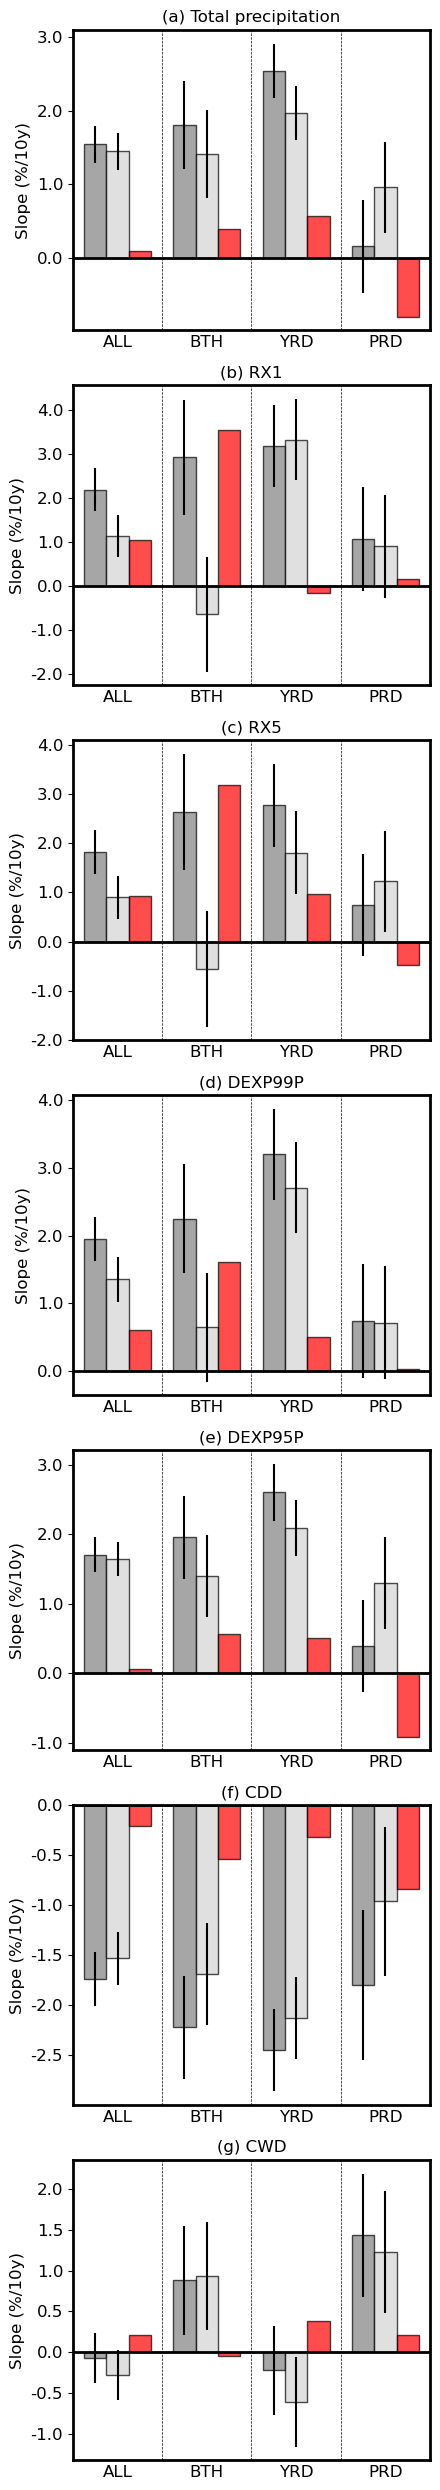

In [33]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(4.5, 25))
num = 0
titlename_list =["Total precipitation", "RX1", "RX5", "DEXP99P", "DEXP95P", "CDD","CWD",
                                            "DLP0.1","DLP1","DLP5","DLP10","DLP20","DLP50",
                                            "None1","Lat","Lon","None2","Urban_Percentage","None3"]
titlename_list = ["(a) Total precipitation", "(b) RX1", "(c) RX5", "(d) DEXP99P", "(e) DEXP95P", "(f) CDD","(g) CWD"]
for ax in axes:
    value = num
    num+=1
    trend = np.loadtxt(fr"D:\grd_studies\grd\data\trend_p\day_trend.txt")
    trend = trend * 1000
    a = np.loadtxt(fr"D:\grd_studies\grd\data/region.txt")
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    # 两个示例列表
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  # 90% 置信区间 
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2)  # 90% 置信区间 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar = []
    total_err = []
    total_lab = []
    total_col = []
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if  a[i,1] < 42 and a[i,1] >36 and a[i,2] < 119 and a[i,2] >111:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,2] < 123 and a[i,2] >115.5 and a[i,1] < 33.5 and a[i,1] >27:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,1] < 26 and a[i,1] >20.5 and a[i,2] < 118 and a[i,2] >110:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    x_pos = np.arange(len(total_bar))
    
    ax.bar(x_pos, total_bar,1, yerr=total_err, align='center', alpha=0.7, edgecolor='black', color=total_col)
    ax.set_xticks([1,5,9,13],["ALL","BTH","YRD","PRD"])
    ax.set_title(titlename_list[num-1])
    ax.set_ylabel('Slope (%/10y)', fontsize=12)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
    ax.axvline(x=3, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=7, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=11, color='black', linestyle='--', linewidth=0.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.xaxis.set_tick_params(labelsize=12,length = 0)
    ax.yaxis.set_tick_params(labelsize=12)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim([-1,len(x_pos)-1])
    plt.tight_layout()
plt.show()
fig.savefig("precipitation_index_day.png", dpi=300, bbox_inches="tight")

### Precipitation Index (Night Time)

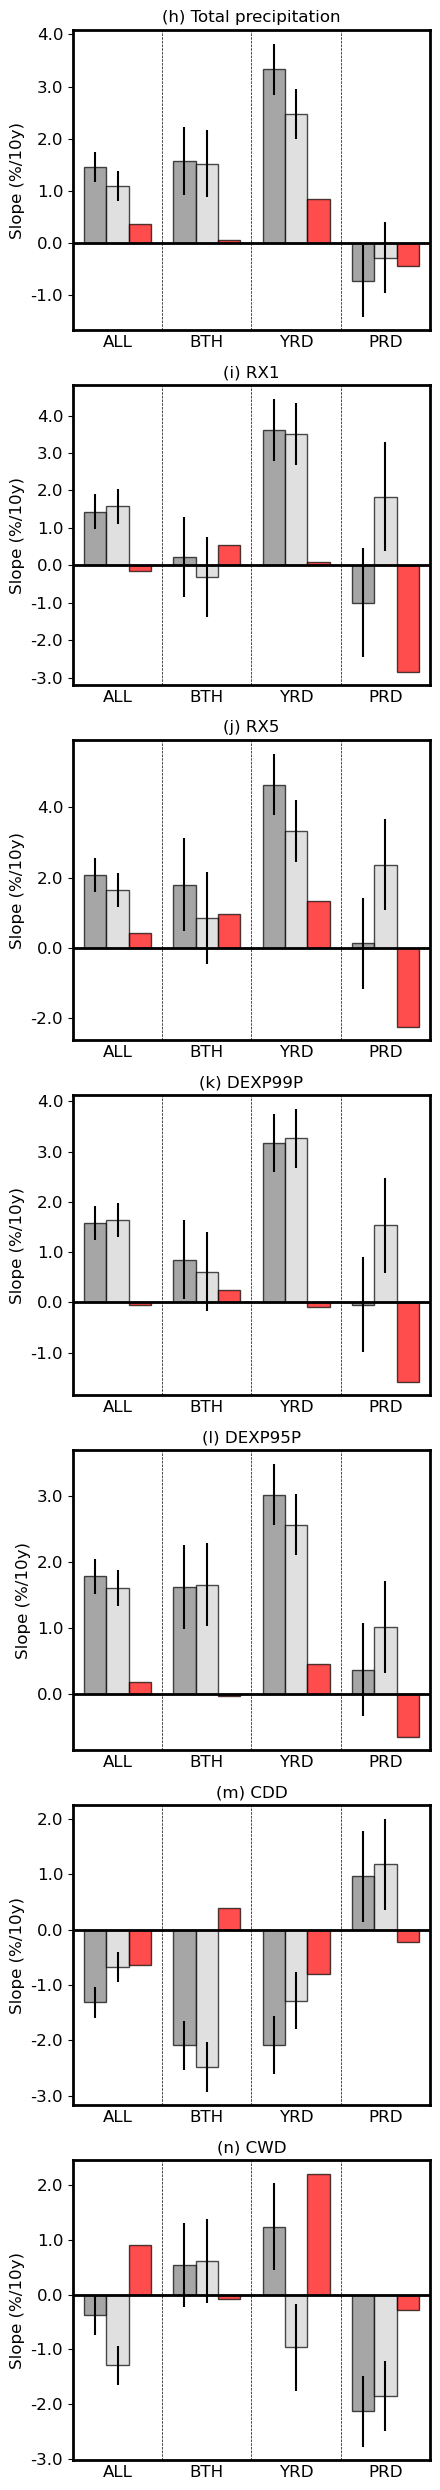

In [32]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(4.5, 25))
num = 0
titlename_list =["Total precipitation", "RX1", "RX5", "DEXP99P", "DEXP95P", "CDD","CWD",
                                            "DLP0.1","DLP1","DLP5","DLP10","DLP20","DLP50",
                                            "None1","Lat","Lon","None2","Urban_Percentage","None3"]
titlename_list = ["(h) Total precipitation", "(i) RX1", "(j) RX5", "(k) DEXP99P", "(l) DEXP95P", "(m) CDD","(n) CWD"]
for ax in axes:
    value = num
    num+=1
    trend = np.loadtxt(fr"D:\grd_studies\grd\data\trend_p\night_trend.txt")
    trend = trend * 1000
    a = np.loadtxt(fr"D:\grd_studies\grd\data/region.txt")
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    # 两个示例列表
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  # 90% 置信区间 
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2)  # 90% 置信区间 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar = []
    total_err = []
    total_lab = []
    total_col = []
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if  a[i,1] < 42 and a[i,1] >36 and a[i,2] < 119 and a[i,2] >111:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,2] < 123 and a[i,2] >115.5 and a[i,1] < 33.5 and a[i,1] >27:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,1] < 26 and a[i,1] >20.5 and a[i,2] < 118 and a[i,2] >110:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    x_pos = np.arange(len(total_bar))
    
    ax.bar(x_pos, total_bar,1, yerr=total_err, align='center', alpha=0.7, edgecolor='black', color=total_col)
    ax.set_xticks([1,5,9,13],["ALL","BTH","YRD","PRD"])
    ax.set_title(titlename_list[num-1])
    ax.set_ylabel('Slope (%/10y)', fontsize=12)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
    ax.axvline(x=3, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=7, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=11, color='black', linestyle='--', linewidth=0.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.xaxis.set_tick_params(labelsize=12,length = 0)
    ax.yaxis.set_tick_params(labelsize=12)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim([-1,len(x_pos)-1])
    plt.tight_layout()
plt.show()
fig.savefig("precipitation_index_night.png", dpi=300, bbox_inches="tight")

### Precipitation Intensity (Day Time)

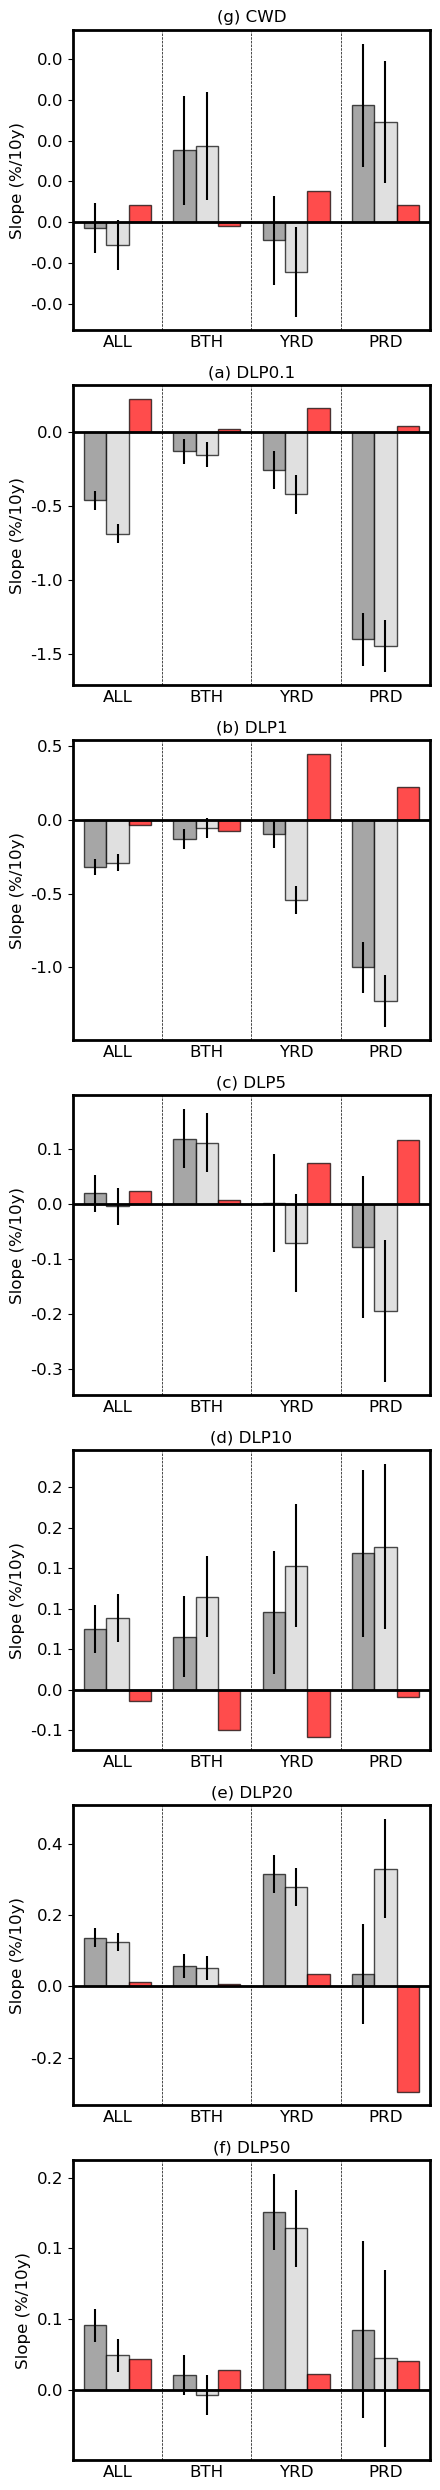

In [31]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(4.5, 25))
num = 6
titlename_list =["Total precipitation", "RX1", "RX5", "DEXP99P", "DEXP95P", "CDD","CWD",
                                            "DLP0.1","DLP1","DLP5","DLP10","DLP20","DLP50",
                                            "None1","Lat","Lon","None2","Urban_Percentage","None3"]
titlename_list = ["(a) Total precipitation", "(b) RX1", "(c) RX5", "(d) DEXP99P", "(e) DEXP95P", "(f) CDD","(g) CWD",
                  "(a) DLP0.1","(b) DLP1","(c) DLP5","(d) DLP10","(e) DLP20","(f) DLP50",]
for ax in axes:
    value = num
    num+=1
    trend = np.loadtxt(fr"D:\grd_studies\grd\data\trend_p\day_trend.txt")
    trend = trend * 10
    a = np.loadtxt(fr"D:\grd_studies\grd\data/region.txt")
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    # 两个示例列表
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  # 90% 置信区间 
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2)  # 90% 置信区间 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar = []
    total_err = []
    total_lab = []
    total_col = []
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if  a[i,1] < 42 and a[i,1] >36 and a[i,2] < 119 and a[i,2] >111:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,2] < 123 and a[i,2] >115.5 and a[i,1] < 33.5 and a[i,1] >27:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,1] < 26 and a[i,1] >20.5 and a[i,2] < 118 and a[i,2] >110:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    x_pos = np.arange(len(total_bar))
    
    ax.bar(x_pos, total_bar,1, yerr=total_err, align='center', alpha=0.7, edgecolor='black', color=total_col)
    ax.set_xticks([1,5,9,13],["ALL","BTH","YRD","PRD"])
    ax.set_title(titlename_list[num-1])
    ax.set_ylabel('Slope (%/10y)', fontsize=12)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
    ax.axvline(x=3, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=7, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=11, color='black', linestyle='--', linewidth=0.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.xaxis.set_tick_params(labelsize=12,length = 0)
    ax.yaxis.set_tick_params(labelsize=12)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim([-1,len(x_pos)-1])
    plt.tight_layout()
plt.show()
fig.savefig("precipitation_intensity_day.png", dpi=300, bbox_inches="tight")

### Precipitation Intensity (Night Time)

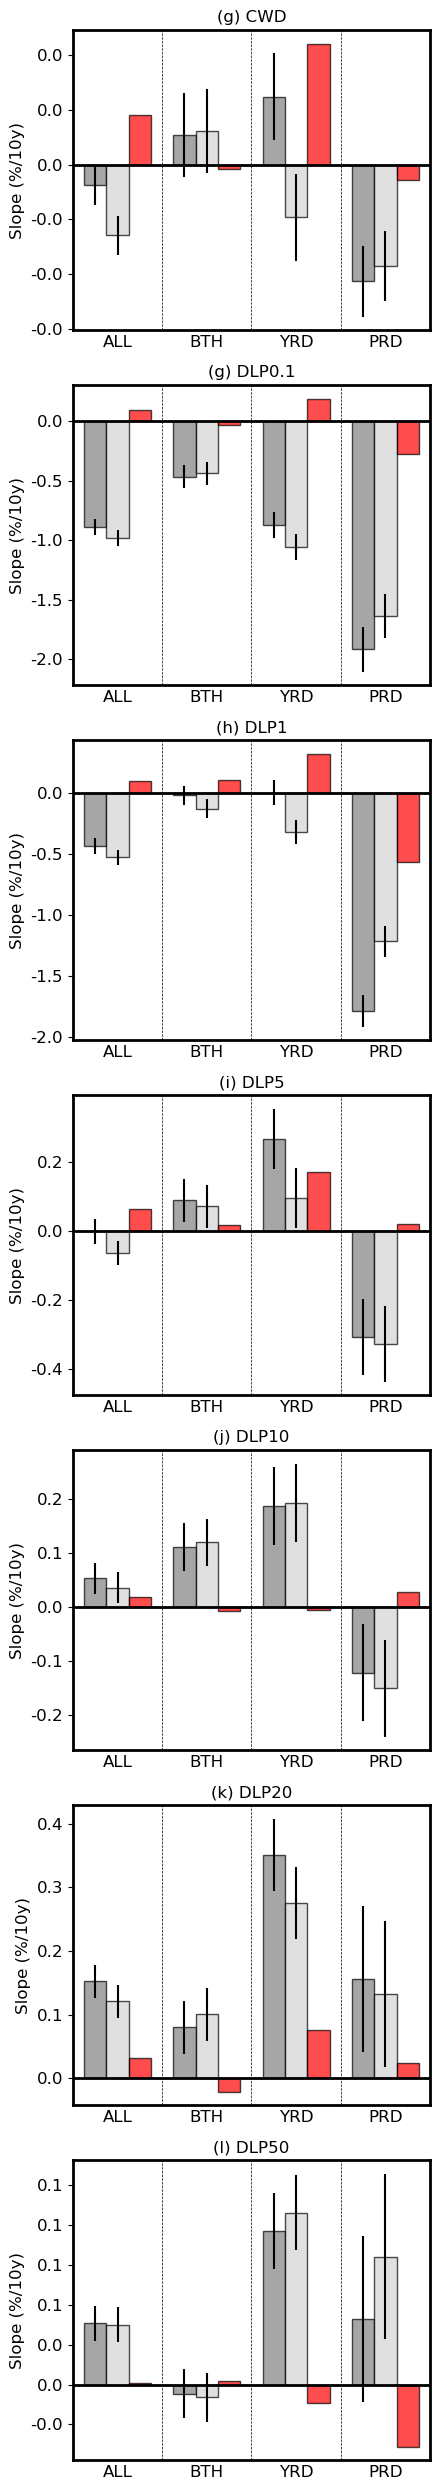

In [30]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(4.5, 25))
num = 6
titlename_list =["Total precipitation", "RX1", "RX5", "DEXP99P", "DEXP95P", "CDD","CWD",
                                            "DLP0.1","DLP1","DLP5","DLP10","DLP20","DLP50",
                                            "None1","Lat","Lon","None2","Urban_Percentage","None3"]
titlename_list = ["(a) Total precipitation", "(b) RX1", "(c) RX5", "(d) DEXP99P", "(e) DEXP95P", "(f) CDD","(g) CWD",
                  "(g) DLP0.1","(h) DLP1","(i) DLP5","(j) DLP10","(k) DLP20","(l) DLP50",]
for ax in axes:
    value = num
    num+=1
    trend = np.loadtxt(fr"D:\grd_studies\grd\data\trend_p\night_trend.txt")
    trend = trend * 10
    a = np.loadtxt(fr"D:\grd_studies\grd\data/region.txt")
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    # 两个示例列表
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  # 90% 置信区间 
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2)  # 90% 置信区间 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar = []
    total_err = []
    total_lab = []
    total_col = []
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if  a[i,1] < 42 and a[i,1] >36 and a[i,2] < 119 and a[i,2] >111:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,2] < 123 and a[i,2] >115.5 and a[i,1] < 33.5 and a[i,1] >27:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist

    urbanlist = []
    countrylist = []
    for i in range(1544):
        if trend[int(a[i,3]),value] > -999:
            if a[i,1] < 26 and a[i,1] >20.5 and a[i,2] < 118 and a[i,2] >110:
                if a[i,-2]>0:
                    urbanlist.append(trend[int(a[i,3]),value])
                else:
                    countrylist.append(trend[int(a[i,3]),value])
    list1 = urbanlist
    list2 = countrylist
    mean_list1 = np.mean(list1)
    std_list1 = stats.sem(list1)
    conf_int1 = stats.t.interval(0.9, len(list1) - 1, loc=mean_list1, scale=std_list1)  
    mean_list2 = np.mean(list2)
    std_list2 = stats.sem(list1)
    conf_int2 = stats.t.interval(0.9, len(list2) - 1, loc=mean_list2, scale=std_list2) 
    diff_means = mean_list1 - mean_list2
    error_bar_list1 = (conf_int1[1] - conf_int1[0]) / 2
    error_bar_list2 = (conf_int2[1] - conf_int2[0]) / 2
    bar_data = [mean_list1, mean_list2, diff_means,0]
    error_bars = [error_bar_list1, error_bar_list2, 0,0]  # 差值无误差
    labels = ['Urban', 'Rural', 'Difference',""]
    colorlist = ["grey","lightgrey","red","black"]
    total_bar += bar_data
    total_err += error_bars
    total_lab += labels
    total_col += colorlist
    x_pos = np.arange(len(total_bar))
    
    ax.bar(x_pos, total_bar,1, yerr=total_err, align='center', alpha=0.7, edgecolor='black', color=total_col)
    ax.set_xticks([1,5,9,13],["ALL","BTH","YRD","PRD"])
    ax.set_title(titlename_list[num-1])
    ax.set_ylabel('Slope (%/10y)', fontsize=12)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
    ax.axvline(x=3, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=7, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=11, color='black', linestyle='--', linewidth=0.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.xaxis.set_tick_params(labelsize=12,length = 0)
    ax.yaxis.set_tick_params(labelsize=12)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim([-1,len(x_pos)-1])
    plt.tight_layout()
plt.show()
fig.savefig("precipitation_intensity_night.png", dpi=300, bbox_inches="tight")